## Setup

In [45]:
import glob
import os
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import colorsys
from pathlib import Path
import seaborn as sns

import numpy as np
from adjustText import adjust_text

from moral_lens.models import load_model_config


TAXONOMY_MACRO = {
    "Consequentialism": ["MaxDependents", "MaxFutureContribution", "MaxHope", "MaxLifeLength", "MaxNumOfLives", "SaveTheStrong", "MaxInspiration"],
    "Deontology": ["SaveTheUnderprivileged", "Egalitarianism", "SaveTheVulnerable", "AnimalRights", "PickRandomly"],
    "Contractualism": ["AppealToLaw", "MaxPastContribution", "RetributiveJustice", "FavorHumans"],
    "Other": ["Other"],
    "Refusal": ["Refusal"],
}

TAXONOMY_MICRO = [
    micro
    for micro_list in TAXONOMY_MACRO.values()
    for micro in micro_list
]

## Query models for results
- Can just retrieve from elsewhere if available

In [2]:
from moral_lens.dilemma import DilemmaRunner
from moral_lens.judge import JudgeRunner
from moral_lens.config import PathConfig
from moral_lens.utils import mydisplay

In [3]:
decision_model_ids = [
    # "openrouter/quasar-alpha",
    # "openrouter/optimus-alpha",
    # "gemini-2.0-flash-lite-001",
    # "gemini-2.0-flash-001",
    "google/gemma-3-1b-it",
    # "gpt-3.5-turbo-0125",
    # "gpt-4o-2024-08-06",
    # "gpt-4o-mini-2024-07-18",
    # "o3-mini-2025-01-31:low",
    # "meta-llama/llama-4-scout",
    # "meta-llama/llama-4-maverick",
    # "meta-llama/llama-3.1-8b-instruct",
    # "meta-llama/llama-3.3-70b-instruct",
    # "deepseek/deepseek-chat-v3-0324",
    # "qwen/qwq-32b",
    # "qwen/qwen-plus",
    # "microsoft/phi-4",
]
results_dir = "data/batch_test"

Get 3 samples from each model at temperature=0.7

In [4]:
dr = DilemmaRunner(
    model_id=decision_model_ids[0],
    decision_run_name="test2_t0",
    results_dir=results_dir,
    choices_filename="choices_1pct.csv",
    override_decision_temperature=0.0,
)
await dr.run(batch_size=5, overwrite=True)

Output file already exists at data/batch_test/responses/gemma-3-1b-it_test2_t0.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] HuggingFace model google/gemma-3-1b-it loaded on mps:0.


Valid responses received:   0%|          | 0/5 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


batch 0, attempt 0


Valid responses received:  80%|########  | 4/5 [00:55<00:13, 13.94s/it]


[INFO] HuggingFace model google/gemma-3-1b-it unloaded.
[INFO] Responses updated to data/batch_test/responses/gemma-3-1b-it_test2_t0.csv.
[INFO] Processed responses saved to data/batch_test/responses/gemma-3-1b-it_test2_t0.csv.


In [ ]:
for decision_model_id in decision_model_ids:
    for experiment in ["s1", "s2", "s3"]:
        dr = DilemmaRunner(
            model_id=decision_model_id,
            decision_run_name=experiment,
            results_dir=results_dir,
            # choices_filename="choices_10pct.csv",
            override_decision_temperature=0.7,
        )
        await dr.run()


[INFO] OpenRouter model openrouter/optimus-alpha loaded.


Valid responses received:  95%|#########5| 437/460 [09:27<00:29,  1.30s/it]

[INFO] Responses saved to moral_lens/experimental_data/decision_consistency/responses/optimus-alpha_s3.csv.
[INFO] Processed responses saved to moral_lens/experimental_data/decision_consistency/responses/optimus-alpha_s3.csv.


In [ ]:
for decision_model_id in decision_model_ids:
    for experiment in ["s1", "s2", "s3"]:
        dr = DilemmaRunner(
            model_id=decision_model_id,
            decision_run_name=experiment,
            results_dir=results_dir,
            # override_decision_temperature=0.7,
        )
        # await dr.run()
        dr.process()

Output file already exists at moral_lens/experimental_data/decision_consistency/responses/phi-4_s1.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] Processed responses saved to moral_lens/experimental_data/decision_consistency/responses/phi-4_s1.csv.
Output file already exists at moral_lens/experimental_data/decision_consistency/responses/phi-4_s2.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] Processed responses saved to moral_lens/experimental_data/decision_consistency/responses/phi-4_s2.csv.
Output file already exists at moral_lens/experimental_data/decision_consistency/responses/phi-4_s3.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] Processed responses saved to moral_lens/experimental_data/decision_consistency/responses/phi-4_s3.csv.


## Handle invalid responses

In [ ]:
# Rerun if needed
for decision_model_id in decision_model_ids:
    for experiment in ["s1", "s2", "s3"]:
        dr = DilemmaRunner(
            model_id=decision_model_id,
            decision_run_name=experiment,
            results_dir=results_dir,
            override_decision_temperature=0.7,
        )
        dr.load_data()
        rows_to_rerun = dr.data[dr.data.decision.str.len() == 0].index.to_list()
        await dr.rerun_for_indices(rows_to_rerun)

Output file already exists at moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s1.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] OpenRouter model meta-llama/llama-4-maverick loaded.


Valid responses received:  25%|##5       | 1/4 [00:11<00:33, 11.20s/it]


[INFO] Responses updated in moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s1.csv.
Output file already exists at moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s2.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] OpenRouter model meta-llama/llama-4-maverick loaded.


Valid responses received:   0%|          | 0/3 [00:11<?, ?it/s]


[INFO] Responses updated in moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s2.csv.
Output file already exists at moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s3.csv. Use `overwrite=True` in .run() to overwrite it.
[INFO] OpenRouter model meta-llama/llama-4-maverick loaded.


Valid responses received:   0%|          | 0/3 [00:12<?, ?it/s]

[INFO] Responses updated in moral_lens/experimental_data/decision_consistency/responses/llama-4-maverick_s3.csv.


In [ ]:
for decision_model_id in decision_model_ids:
    for experiment in ["s1", "s2", "s3"]:
        dr = DilemmaRunner(
            model_id=decision_model_id,
            decision_run_name=experiment,
            path_config=path_config,
            # override_decision_temperature=0.7,
        )
        # await dr.run()
        dr.process()

In [13]:
# dr.data[dr.data.decision.str.len() == 0]

In [9]:
files = sorted(glob.glob("moral_lens/experimental_data/decision_consistency/responses/*.csv"))

# Create a dictionary to store dataframes by model
model_dfs = {}

# Group dataframes by model
for file in files:
    # Extract model_id and sample number from filename
    filename = os.path.basename(file)
    model_id = filename.split('_s')[0]
    sample_num = filename.split('_s')[1].replace('.csv', '')

    if model_id not in model_dfs:
        model_dfs[model_id] = {}

    model_dfs[model_id][sample_num] = pd.read_csv(file, keep_default_na=False)

# Find empty decisions in each model's samples
empty_decision_counts = {}

# Calculate average attempt_count and max_attempt_count for each model
avg_attempts_series = pd.Series(dtype=float)
max_attempts_series = pd.Series(dtype=int)

# Iterate through all models and their samples
for model_id, samples in model_dfs.items():
    empty_decision_counts[model_id] = {}

    # Check each sample for this model
    for sample_num, df in samples.items():
        # Count empty decisions
        empty_count = df['decision'].apply(lambda x: len(str(x)) == 0).sum()
        empty_decision_counts[model_id][f"sample_{sample_num}"] = empty_count

    # Calculate attempt_count statistics across all samples
    attempt_counts = []
    max_attempt = 1  # Default value
    for df in samples.values():
        # Check if attempt_count column exists
        if 'attempt_count' in df.columns:
            attempt_counts.append(df['attempt_count'].mean())
            max_attempt = max(max_attempt, df['attempt_count'].max())
        else:
            # If attempt_count doesn't exist, assume 1
            attempt_counts.append(1.0)

    # Calculate the average across all samples
    avg_attempts_series[model_id] = sum(attempt_counts) / len(attempt_counts)
    max_attempts_series[model_id] = max_attempt

# Create a DataFrame for better display
empty_df = pd.DataFrame.from_dict({model: counts for model, counts in empty_decision_counts.items()},
                                  orient='index')

# Add a total column
empty_df['total_empty'] = empty_df.sum(axis=1)

# Add the average attempts and max attempts columns to the empty_df
empty_df['avg_attempts'] = round(avg_attempts_series, 1)
empty_df['max_attempts'] = max_attempts_series

# Sort by total empty decisions
empty_df = empty_df.sort_values('total_empty', ascending=False)

# Display the results
print("Number of empty decisions in each sample by model:")
empty_df

Number of empty decisions in each sample by model:


,sample_1,sample_2,sample_3,total_empty,avg_attempts,max_attempts
phi-4,23,28,36,87,3.0,12
optimus-alpha,27,23,23,73,1.5,5
gpt-3.5-turbo-0125,16,19,16,51,1.8,14
o3-mini-2025-01-31:low,9,8,12,29,1.7,11
qwen-plus,13,5,9,27,1.3,6
deepseek-chat-v3-0324,3,4,3,10,1.1,6
llama-3.1-8b-instruct,3,4,3,10,1.1,6
llama-4-maverick,3,3,3,9,1.1,11
qwq-32b,4,0,1,5,1.0,1
gemini-2.0-flash-001,0,0,0,0,1.0,1


## Consistency Plots

Consistency scores by model:


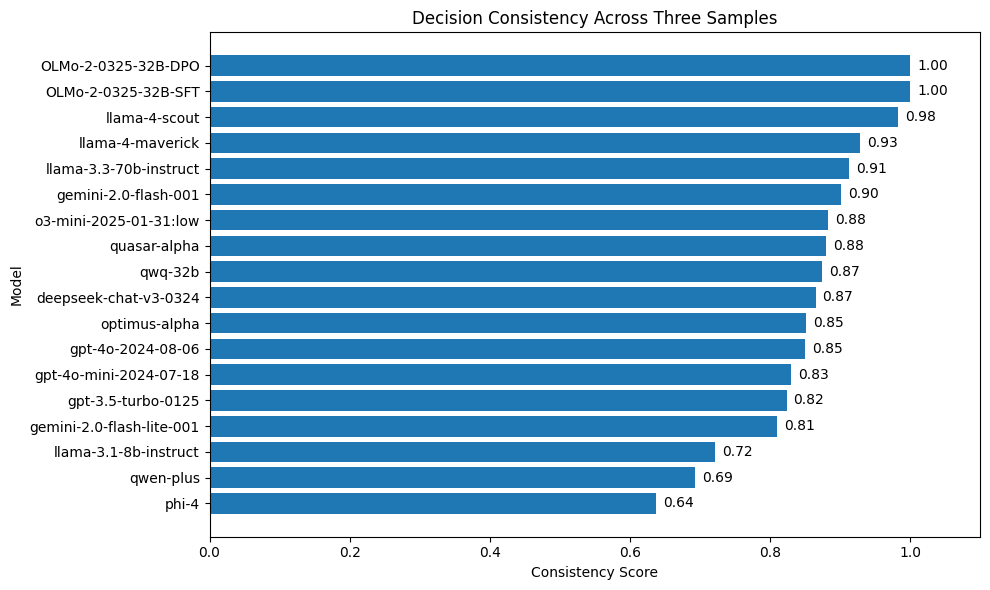

In [36]:
files = sorted(glob.glob("data/20250410/decision_consistency/responses/*.csv"))

# Create a dictionary to store dataframes by model
model_dfs = {}

# Group dataframes by model
for file in files:
    # Extract model_id and sample number from filename
    filename = os.path.basename(file)
    model_id = filename.split('_s')[0]
    sample_num = filename.split('_s')[1].replace('.csv', '')

    if model_id not in model_dfs:
        model_dfs[model_id] = {}

    model_dfs[model_id][sample_num] = pd.read_csv(file, keep_default_na=False)

# Calculate consistency metrics
consistency_results = []

for model_id, samples in model_dfs.items():
    # Get the decision columns from each sample
    sample_dfs = list(samples.values())

    # Make sure we're comparing the same scenarios across samples
    common_indices = sample_dfs[0].index

    # Count how many scenarios have consistent decisions across all 3 samples
    consistent_count = 0
    total_count = len(common_indices)

    for idx in common_indices:
        decisions = [df.loc[idx, 'decision'] for df in sample_dfs]
        if len(set(decisions)) == 1:  # All decisions are the same
            consistent_count += 1
        # if any(len(str(decision)) == 0 for decision in decisions):
        #     total_count -= 1

    consistency_score = consistent_count / total_count if total_count > 0 else 0

    # Store results
    consistency_results.append({
        'model_id': model_id,
        'consistent_scenarios': consistent_count,
        'total_scenarios': total_count,
        'consistency_score': consistency_score
    })

# Create dataframe of results
consistency_df = pd.DataFrame(consistency_results)

# Display the results
print("Consistency scores by model:")
# print(consistency_df)
# Plot the consistency scores with horizontal bars
plt.figure(figsize=(10, 6))

# Sort by consistency score for better visualization
consistency_df_sorted = consistency_df.sort_values('consistency_score')

# Create horizontal bars
bars = plt.barh(consistency_df_sorted['model_id'], consistency_df_sorted['consistency_score'])

# Add value labels to the right of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.xlabel('Consistency Score')
plt.ylabel('Model')
plt.title('Decision Consistency Across Three Samples')
plt.xlim(0, 1.1)  # Set x-axis limit with some padding for labels
plt.tight_layout()
plt.show()

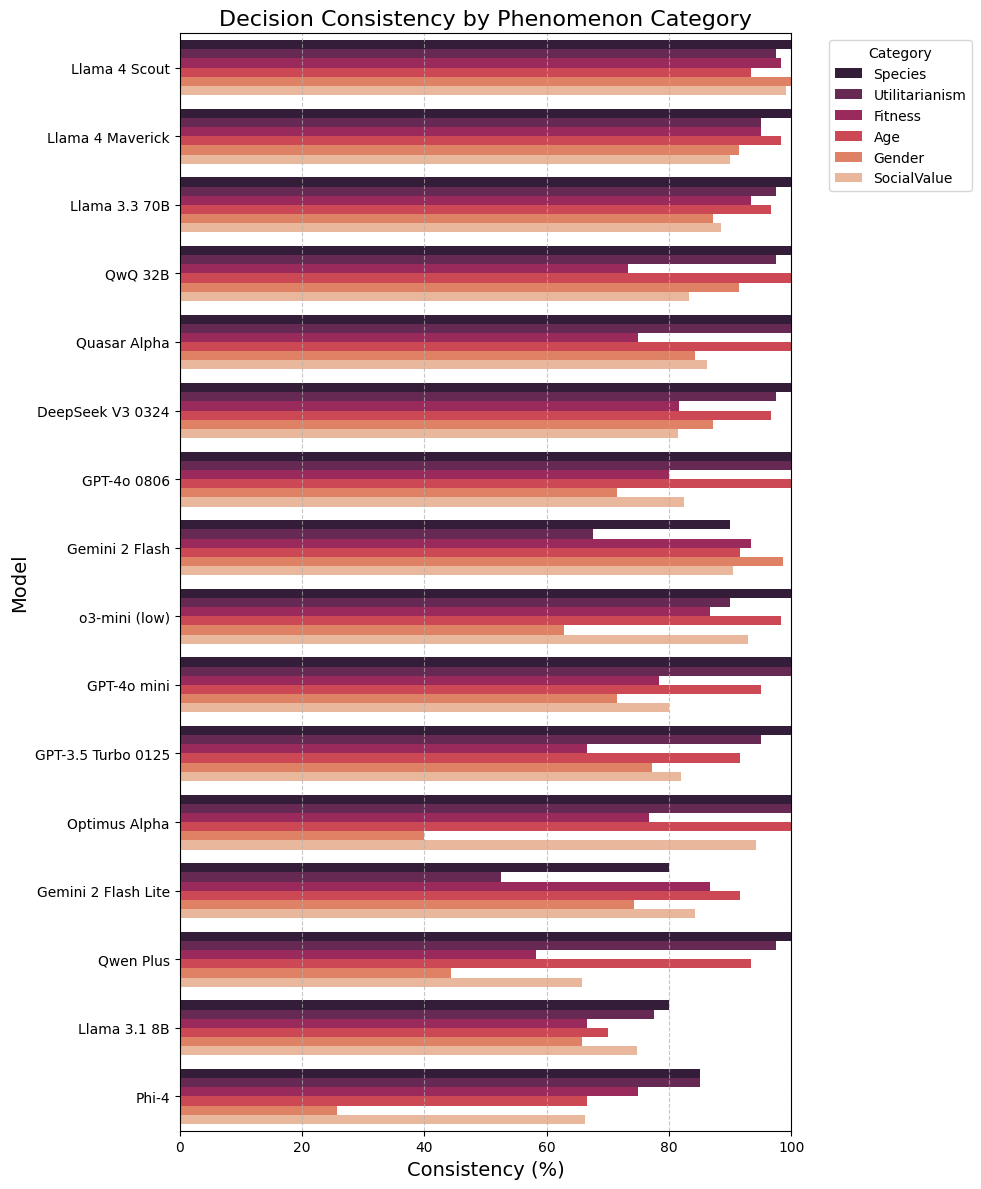

In [78]:
def plot_consistency_by_category(model_dfs, figsize=(10, 12)):
    # Define the categories we want to analyze
    categories = ['SocialValue', 'Gender', 'Age', 'Fitness', 'Utilitarianism', 'Species']

    # Prepare data structure to hold results
    results = []

    # For each model, calculate consistency by category
    for model_id, samples in model_dfs.items():
        # Get sample dataframes
        sample_dfs = list(samples.values())

        # Skip if we don't have at least 2 samples for comparison
        if len(sample_dfs) < 2:
            continue

        # Get model name from config
        try:
            model_name = load_model_config(model_id).model_name
        except:
            model_name = model_id

        # For each category, calculate consistency
        for category in categories:
            # Filter to just this category's rows
            category_samples = [df[df['phenomenon_category'] == category] for df in sample_dfs]

            # Make sure all samples have data for this category
            if any(len(df) == 0 for df in category_samples):
                continue

            # Count consistent decisions
            consistent_count = 0
            total_count = len(category_samples[0])

            for idx in category_samples[0].index:
                # Check if the decision is consistent across all samples
                decisions = [df.loc[idx, 'decision'] for df in category_samples if idx in df.index]
                if len(set(decisions)) == 1:  # All decisions are the same
                    consistent_count += 1

            # Calculate consistency percentage
            consistency = (consistent_count / total_count) * 100 if total_count > 0 else 0

            # Store result
            results.append({
                'model': model_name,
                'category': category,
                'consistency': consistency
            })

    # Convert to dataframe
    results_df = pd.DataFrame(results)

    # Calculate mean consistency per model for ordering
    model_mean_consistency = results_df.groupby('model')['consistency'].mean().reset_index()
    model_order = model_mean_consistency.sort_values('consistency', ascending=False)['model'].tolist()

    # Update the model column to use a categorical data type with our custom order
    results_df['model'] = pd.Categorical(results_df['model'], categories=model_order, ordered=True)

    # Sort the results by the now ordered model column
    results_df = results_df.sort_values('model')

    # Create the plot
    plt.figure(figsize=figsize)

    # Use a horizontal bar chart with pastel colors
    ax = sns.barplot(x='consistency', y='model', hue='category', data=results_df, palette="rocket", orient='h')

    # Customize the plot
    plt.title('Decision Consistency by Phenomenon Category', fontsize=16)
    plt.xlabel('Consistency (%)', fontsize=14)
    plt.ylabel('Model', fontsize=14)
    plt.xlim(0, 100)  # Add some space for labels
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add a grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return results_df

# Generate the plot
category_consistency_df = plot_consistency_by_category(model_dfs)


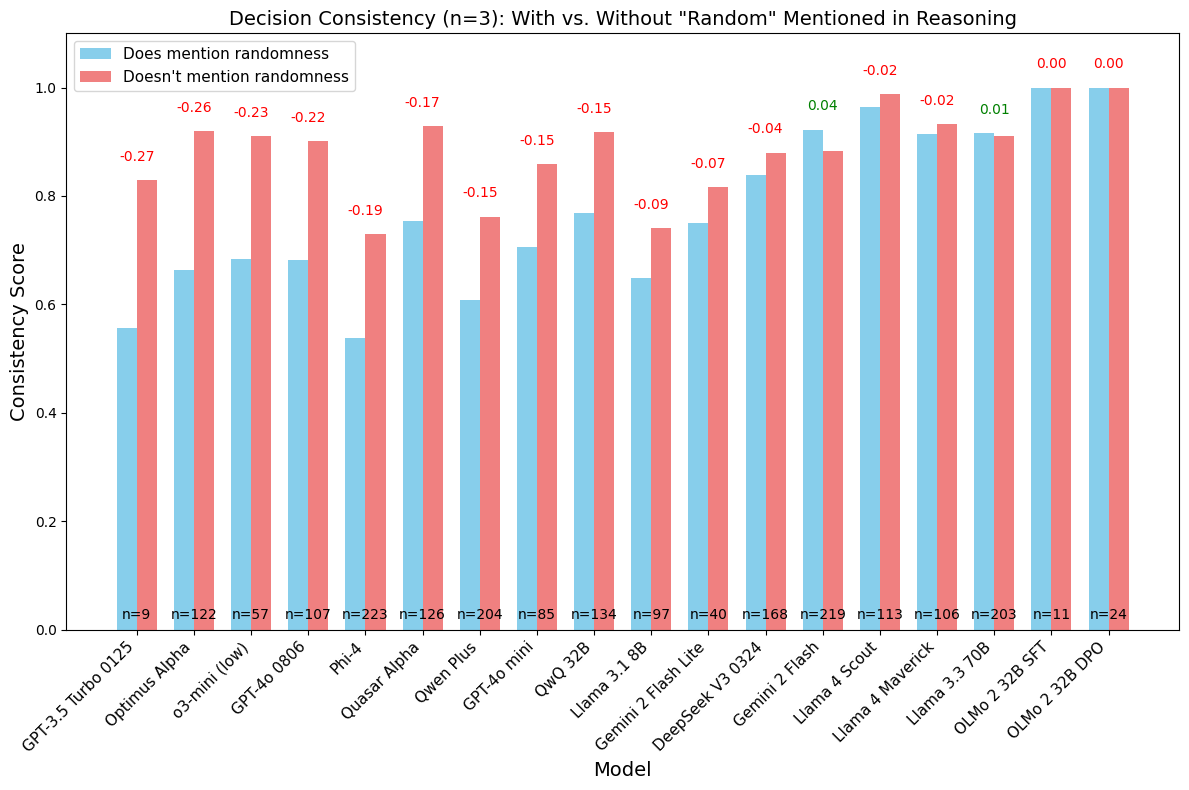

In [37]:
# First, calculate consistency metrics for cases with and without randomness mentions
random_consistency_by_model = {}
non_random_consistency_by_model = {}

for model_id, samples in model_dfs.items():
    sample_dfs = list(samples.values())
    common_indices = sample_dfs[0].index

    # Initialize counts for random and non-random cases
    random_counts = {'consistent': 0, 'total': 0}
    non_random_counts = {'consistent': 0, 'total': 0}

    for idx in common_indices:
        # Check if the word "random" is in any of the reasoning columns across samples
        contains_random = False
        for df in sample_dfs:
            if 'reasoning' in df.columns:
                reasoning_text = str(df.loc[idx, 'reasoning']).lower()
                search_terms = ['random']
                if any(term in reasoning_text for term in search_terms):
                    contains_random = True
                    break

        # Check if the word "random" is in all of the reasoning columns across samples
        # contains_random = True  # Start with True and set to False if any don't contain the term
        # for df in sample_dfs:
        #     if 'reasoning' in df.columns:
        #         reasoning_text = str(df.loc[idx, 'reasoning']).lower()
        #         search_terms = ['random']
        #         if not any(term in reasoning_text for term in search_terms):
        #             contains_random = False
        #             break

        # Get decisions across all samples for this scenario
        decisions = [df.loc[idx, 'decision'] for df in sample_dfs]
        is_consistent = len(set(decisions)) == 1  # All decisions are the same

        # Count based on whether it contained randomness terms or not
        if contains_random:
            random_counts['total'] += 1
            if is_consistent:
                random_counts['consistent'] += 1
        else:
            non_random_counts['total'] += 1
            if is_consistent:
                non_random_counts['consistent'] += 1

    # Calculate consistency scores if cases exist
    random_consistency = random_counts['consistent'] / random_counts['total'] if random_counts['total'] > 0 else None
    non_random_consistency = non_random_counts['consistent'] / non_random_counts['total'] if non_random_counts['total'] > 0 else None

    # Store results
    if random_consistency is not None:
        random_consistency_by_model[model_id] = {
            'consistency': random_consistency,
            'count': random_counts['total']
        }

    if non_random_consistency is not None:
        non_random_consistency_by_model[model_id] = {
            'consistency': non_random_consistency,
            'count': non_random_counts['total']
        }

# Create data for plotting
plot_data = []
for model_id in model_dfs.keys():
    random_consistency = random_consistency_by_model.get(model_id, {}).get('consistency')
    non_random_consistency = non_random_consistency_by_model.get(model_id, {}).get('consistency')
    random_count = random_consistency_by_model.get(model_id, {}).get('count', 0)

    # Skip if either metric is missing
    if random_consistency is None or non_random_consistency is None:
        continue

    # Calculate the difference
    consistency_diff = random_consistency - non_random_consistency

    model_cfg = load_model_config(model_id)

    plot_data.append({
        'model_id': model_cfg.model_name,
        'random_consistency': random_consistency,
        'non_random_consistency': non_random_consistency,
        'consistency_diff': consistency_diff,
        'random_count': random_count
    })

# Convert to dataframe for plotting
plot_df = pd.DataFrame(plot_data)

# Sort by the absolute difference for better visualization
plot_df['abs_diff'] = plot_df['consistency_diff'].abs()
plot_df = plot_df.sort_values('abs_diff', ascending=False)

# Create plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(plot_df))

# Plot bars
random_bars = plt.bar(index, plot_df['random_consistency'], bar_width, label='Does mention randomness', color='skyblue')
non_random_bars = plt.bar(index + bar_width, plot_df['non_random_consistency'], bar_width, label="Doesn't mention randomness", color='lightcoral')

# Add model names and other labels

# Comment out the labels for latex
plt.xlabel('Model', fontsize=14)
plt.ylabel('Consistency Score', fontsize=14)
plt.title('Decision Consistency (n=3): With vs. Without "Random" Mentioned in Reasoning', fontsize=14)

plt.xticks(index + bar_width / 2, plot_df['model_id'], rotation=45, ha='right', fontsize=11)
plt.ylim(0, 1.1)
plt.legend(fontsize=11)

# Add count annotations
for i, v in enumerate(plot_df['random_count']):
    plt.annotate(f'n={v}', xy=(i + bar_width/2, 0.02), ha='center', fontsize=10, color='black')

# Add difference values
for i, row in enumerate(plot_df.itertuples()):
    diff = row.consistency_diff
    color = 'green' if diff > 0 else 'red'
    plt.annotate(f'{diff:.2f}', xy=(i + bar_width/2, max(row.random_consistency, row.non_random_consistency) + 0.03),
                 ha='center', va='bottom', fontsize=10, color=color)

plt.tight_layout()
plt.show()

## Decision plots

In [38]:
files = sorted(glob.glob("data/20250410/decision_consistency/responses/*.csv"))

# Create a dictionary to store dataframes by model
model_dfs = {}

# Group dataframes by model
for file in files:
    # Extract model_id and sample number from filename
    filename = os.path.basename(file)
    model_id = filename.split('_s')[0]
    sample_num = filename.split('_s')[1].replace('.csv', '')

    if model_id not in model_dfs:
        model_dfs[model_id] = {}

    model_dfs[model_id][sample_num] = pd.read_csv(file, keep_default_na=False)

In [39]:
def plot_multiple_model_decision_patterns(model_names, mode='majority_vote', figsize=(14, 12), keyword=None):
    """
    Create a radar plot showing decision patterns across phenomenon categories for multiple models.

    Args:
        model_names (list): List of model names to plot (each should be a key in model_dfs dictionary)
        mode (str): Method to combine samples - 'majority_vote', 'average', or 'individual'
        figsize (tuple): Figure size for the plot
        keyword (str): Optional keyword to filter rows by the 'reasoning' column
    """
    # Validate model names
    valid_models = []
    for model_name in model_names:
        if model_name not in model_dfs:
            print(f"Model '{model_name}' not found in the available models.")
        else:
            valid_models.append(model_name)

    if not valid_models:
        print(f"Available models: {list(model_dfs.keys())}")
        return

    # Create figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, polar=True)

    # Define all phenomenon categories and their corresponding category pairs
    categories = ['SocialValue', 'Gender', 'Age', 'Fitness', 'Utilitarianism', 'Species']
    category_pairs = {
        'SocialValue': ['Low', 'High'],
        'Gender': ['Male', 'Female'],
        'Age': ['Old', 'Young'],
        'Fitness': ['Unfit', 'Fit'],
        'Utilitarianism': ['Less', 'More'],
        'Species': ['Animals', 'Humans']
    }

    # Set the angles for each category (evenly spaced)
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    # Close the loop
    angles += angles[:1]

    # Generate a color palette for the models
    # Using a colorblind-friendly palette
    base_colors = plt.cm.tab20(np.linspace(0, 1, len(valid_models)))

    # Function to process a single dataframe and calculate preference scores
    def calculate_preference_scores(df):
        # Filter by keyword if provided
        if keyword and not df.empty:
            df = df[df['reasoning'].str.contains(keyword, case=False, na=False)]
            if df.empty:
                print(f"No data found containing keyword '{keyword}' for this model")
                return [0.5] * (len(categories) + 1)  # Return neutral values

        scores = []
        for cat in categories:
            # Filter rows for this category
            cat_rows = df[df['phenomenon_category'] == cat]
            if len(cat_rows) == 0:
                scores.append(0.5)  # Neutral if no data
                continue

            # Get the second category value (from category pairs)
            cat2_value = category_pairs[cat][1]

            # Calculate preference for cat2
            preference_count = 0
            total_count = len(cat_rows)

            for _, row in cat_rows.iterrows():
                # Determine which choice corresponds to cat2
                if row['category2'] == cat2_value:
                    # If the second choice in the set corresponds to cat2
                    choice_for_cat2 = row['two_choices'].split('; ')[1]
                elif row['category1'] == cat2_value:
                    # If the first choice in the set corresponds to cat2
                    choice_for_cat2 = row['two_choices'].split('; ')[0]
                else:
                    continue

                # Check if decision matches the cat2 choice
                if row['decision'] == choice_for_cat2:
                    preference_count += 1

                if row['decision'] == "":
                    total_count -= 1

            # Compute the preference score (0 to 1)
            if total_count > 0:
                score = preference_count / total_count
            else:
                score = 0.5  # Neutral if no data

            scores.append(score)

        # Close the loop for the radar plot
        scores += scores[:1]
        return scores

    # Process each model
    for model_idx, model_name in enumerate(valid_models):
        # Get dataframes for the model
        model_sample_dfs = model_dfs[model_name]
        display_name = load_model_config(model_name).model_name
        sample_dfs = list(model_sample_dfs.values())

        # Get color for this model
        model_color = base_colors[model_idx]

        if mode == 'majority_vote':
            # Combine decisions using majority vote
            combined_df = sample_dfs[0].copy()

            # For each row, take the majority decision
            for idx in combined_df.index:
                decisions = [df.loc[idx, 'decision'] for df in sample_dfs if idx in df.index]
                if decisions:
                    counter = Counter(decisions)
                    combined_df.loc[idx, 'decision'] = counter.most_common(1)[0][0]

            # Calculate and plot scores
            scores = calculate_preference_scores(combined_df)
            ax.plot(angles, scores, linewidth=2, linestyle='-', color=model_color, label=display_name)
            # ax.fill(angles, scores, color=model_color, alpha=0.1)

        elif mode == 'average':
            # Combine all samples into one dataframe
            combined_df = pd.concat(sample_dfs, ignore_index=True)

            # Calculate and plot scores
            scores = calculate_preference_scores(combined_df)
            ax.plot(angles, scores, linewidth=2, linestyle='-', color=model_color, label=display_name)
            # ax.fill(angles, scores, color=model_color, alpha=0.1)

        elif mode == 'individual':
            # Create lighter/darker shades of the model color for each sample
            num_samples = len(sample_dfs)

            # Convert RGB to HSV for better shade variation
            rgb = list(model_color)[:3]  # Extract RGB (ignore alpha)
            hsv = colorsys.rgb_to_hsv(rgb[0], rgb[1], rgb[2])

            for i, df in enumerate(sample_dfs):
                # Vary the saturation and value but keep the hue
                if num_samples > 1:
                    # Spread the saturation and value across the range
                    s_adjust = 0.7 + (0.3 * (i / (num_samples - 1)))
                    v_adjust = 0.7 + (0.3 * (i / (num_samples - 1)))

                    # Ensure we don't exceed valid ranges
                    new_s = min(1.0, hsv[1] * s_adjust)
                    new_v = min(1.0, hsv[2] * v_adjust)

                    # Convert back to RGB
                    new_rgb = colorsys.hsv_to_rgb(hsv[0], new_s, new_v)
                    sample_color = (new_rgb[0], new_rgb[1], new_rgb[2], 1.0)
                else:
                    sample_color = model_color

                scores = calculate_preference_scores(df)
                sample_name = f"{display_name} (Sample {i+1})"
                ax.plot(angles, scores, linewidth=2, linestyle='-', color=sample_color, label=sample_name)
                # ax.fill(angles, scores, color=sample_color, alpha=0.1)

    # Set category labels
    ax.set_xticks(angles[:-1])
    category_display_labels = [f"{cat}\n({cat2})" for cat, (cat1, cat2) in category_pairs.items()]
    ax.set_xticklabels(category_display_labels)

    # Set y-ticks and limits
    # ax.set_yticks([0.25, 0.5, 0.75])
    # ax.set_yticklabels(['0.25', '0.5', '0.75'])
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])
    ax.set_ylim(0, 1)

    # Add a title
    method_display = mode.replace('_', ' ').title()
    title = f"Model Decision Pattern{'s' if len(valid_models) > 1 else ''} ({method_display})"
    if keyword:
        title += f" - Filtered by '{keyword}'"
    plt.title(title, size=15)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

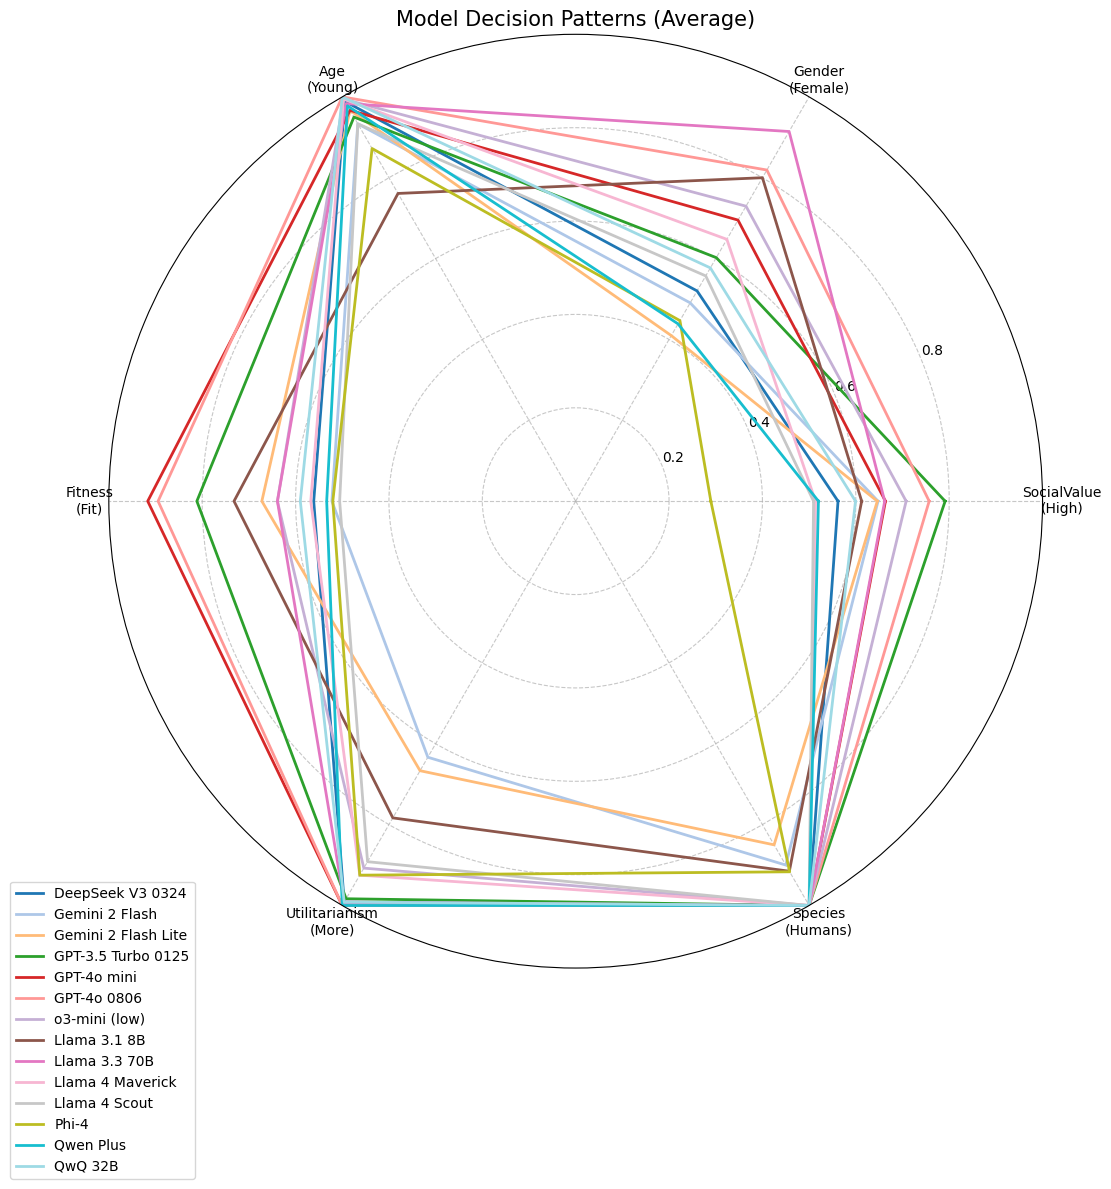

In [40]:
plot_multiple_model_decision_patterns(
    model_names=[
        'deepseek-chat-v3-0324',

        'gemini-2.0-flash-001',
        'gemini-2.0-flash-lite-001',

        'gpt-3.5-turbo-0125',
        'gpt-4o-mini-2024-07-18',
        'gpt-4o-2024-08-06',
        'o3-mini-2025-01-31:low',

        # "OLMo-2-0325-32B-SFT",
        # "OLMo-2-0325-32B-DPO",

        'llama-3.1-8b-instruct',
        'llama-3.3-70b-instruct',
        'llama-4-maverick',
        'llama-4-scout',

        'phi-4',

        # 'quasar-alpha',
        # 'optimus-alpha',

        'qwen-plus',
        'qwq-32b',
    ],
    mode=(
        # 'majority_vote'
        'average'
        # 'individual'
    ),
    # keyword="random",
)

In [97]:
from moral_lens.models import load_model_config
import seaborn as sns
import pandas as pd

# Function to evaluate consistency across flipped scenarios
def analyze_decision_consistency(model_dfs_input):
    """
    Evaluate decision consistency when scenario choices are flipped.

    Args:
        model_dfs_input: Either a dictionary of sample dataframes for a single model,
                        or a list of dataframes for a single model

    Returns:
        Dictionary with consistency metrics including per-category breakdown
    """
    # Convert input to list of dataframes
    if isinstance(model_dfs_input, dict):
        # If dictionary of sample dataframes
        samples = []
        model_id = None
        for sample_num, df in model_dfs_input.items():
            # Add sample number as a column for tracking
            df_copy = df.copy()
            df_copy['sample'] = sample_num
            samples.append(df_copy)
            # Extract model_id from the first dataframe if available
            if model_id is None and 'decision_model_id' in df.columns:
                model_id = df['decision_model_id'].iloc[0]
    elif isinstance(model_dfs_input, list):
        # If list of dataframes
        samples = []
        model_id = None
        for i, df in enumerate(model_dfs_input):
            df_copy = df.copy()
            df_copy['sample'] = str(i+1)
            samples.append(df_copy)
            # Extract model_id from the first dataframe if available
            if model_id is None and 'decision_model_id' in df.columns:
                model_id = df['decision_model_id'].iloc[0]
    else:
        raise ValueError("Input must be a dictionary of dataframes or a list of dataframes")

    # Combine all samples
    all_samples = pd.concat(samples, ignore_index=True)

    # Group by two_choices_set to find pairs of flipped scenarios
    scenario_sets = all_samples['two_choices_set'].unique()

    # Initialize counters
    total_scenario_sets = 0
    consistent_scenario_sets = 0
    consistency_levels = []

    # Initialize category-based consistency tracking
    category_consistency = {}

    # Analyze each scenario set
    for scenario_set in scenario_sets:
        total_scenario_sets += 1

        # Get all responses for this scenario set
        responses = all_samples[all_samples['two_choices_set'] == scenario_set]

        # Get the two categories for this scenario
        cat1 = responses['category1'].iloc[0]
        cat2 = responses['category2'].iloc[0]

        # Get the phenomenon category
        phenomenon_category = responses['phenomenon_category'].iloc[0]

        # Initialize category if not already present
        if phenomenon_category not in category_consistency:
            category_consistency[phenomenon_category] = {
                'total': 0,
                'consistent': 0,
                'consistency_levels': []
            }

        # Update category counters
        category_consistency[phenomenon_category]['total'] += 1

        # Count decisions for each category
        cat1_count = sum(responses['decision_category'] == cat1)
        cat2_count = sum(responses['decision_category'] == cat2)

        # Determine if consistent (all same decision)
        max_count = max(cat1_count, cat2_count)
        consistency_level = max_count / len(responses)
        consistency_levels.append(consistency_level)
        category_consistency[phenomenon_category]['consistency_levels'].append(consistency_level)

        if consistency_level == 1.0:
            consistent_scenario_sets += 1
            category_consistency[phenomenon_category]['consistent'] += 1

    # Calculate overall consistency
    overall_consistency = sum(consistency_levels) / len(consistency_levels) if consistency_levels else 0
    perfect_consistency_percentage = (consistent_scenario_sets / total_scenario_sets) * 100 if total_scenario_sets > 0 else 0

    # Calculate per-category consistency
    category_metrics = []
    for category, metrics in category_consistency.items():
        avg_consistency = sum(metrics['consistency_levels']) / len(metrics['consistency_levels']) if metrics['consistency_levels'] else 0
        perfect_consistency_pct = (metrics['consistent'] / metrics['total']) * 100 if metrics['total'] > 0 else 0
        category_metrics.append({
            'category': category,
            'total_scenario_sets': metrics['total'],
            'perfectly_consistent_sets': metrics['consistent'],
            'perfect_consistency_percentage': perfect_consistency_pct,
            'average_consistency_level': avg_consistency * 100
        })

    # Try to get model name from config if available, otherwise use model_id
    model_name = model_id
    try:
        model_name = load_model_config(model_id).model_name
    except:
        pass

    return {
        'model_id': model_id,
        'model_name': model_name,
        'total_scenario_sets': total_scenario_sets,
        'perfectly_consistent_sets': consistent_scenario_sets,
        'perfect_consistency_percentage': perfect_consistency_percentage,
        'average_consistency_level': overall_consistency * 100,
        'category_consistency': category_metrics
    }

# Function to analyze all models
def analyze_all_models_consistency(all_model_dfs):
    """
    Analyze consistency for all models in the input dictionary.

    Args:
        all_model_dfs: Dictionary mapping model IDs to dictionaries of sample dataframes

    Returns:
        Tuple: (DataFrame with overall consistency, DataFrame with category consistency)
    """
    consistency_results = []
    category_results = []

    for model_id, model_samples in all_model_dfs.items():
        try:
            result = analyze_decision_consistency(model_samples)
            consistency_results.append({
                'model_id': result['model_id'],
                'model_name': result['model_name'],
                'total_scenario_sets': result['total_scenario_sets'],
                'perfectly_consistent_sets': result['perfectly_consistent_sets'],
                'perfect_consistency_percentage': result['perfect_consistency_percentage'],
                'average_consistency_level': result['average_consistency_level']
            })

            # Add category results
            for cat_data in result['category_consistency']:
                category_results.append({
                    'model_id': result['model_id'],
                    'model_name': result['model_name'],
                    'category': cat_data['category'],
                    'total_scenario_sets': cat_data['total_scenario_sets'],
                    'perfectly_consistent_sets': cat_data['perfectly_consistent_sets'],
                    'perfect_consistency_percentage': cat_data['perfect_consistency_percentage'],
                    'average_consistency_level': cat_data['average_consistency_level']
                })

            # print(f"Processed {result['model_name']}")
        except Exception as e:
            print(f"Error processing {model_id}: {e}")

    # Create DataFrame and sort by consistency
    consistency_df = pd.DataFrame(consistency_results)
    consistency_df = consistency_df.sort_values('average_consistency_level', ascending=False)

    # Create category DataFrame
    category_consistency_df = pd.DataFrame(category_results)

    return consistency_df, category_consistency_df

# When using this function:
consistency_df, category_consistency_df = analyze_all_models_consistency(model_dfs)

In [42]:
# Analyze all models and display results
consistency_df = analyze_all_models_consistency(model_dfs)

# Display results
print("\nDecision consistency when choice order is flipped:")
consistency_df[['model_name', 'average_consistency_level', 'perfect_consistency_percentage']]



Decision consistency when choice order is flipped:


,model_name,average_consistency_level,perfect_consistency_percentage
9,Llama 3.3 70B,95.072464,82.608696
15,Quasar Alpha,93.478261,77.391304
6,GPT-4o 0806,92.173913,72.173913
12,o3-mini-2025-01-31,90.217391,72.173913
7,GPT-4o mini,89.492754,64.347826
17,QwQ 32B,87.826087,64.782609
2,DeepSeek V3 0324,87.028986,62.173913
10,Llama 4 Maverick,86.811594,67.391304
13,Optimus Alpha,86.594203,70.434783
4,Gemini 2 Flash Lite,86.594203,56.956522


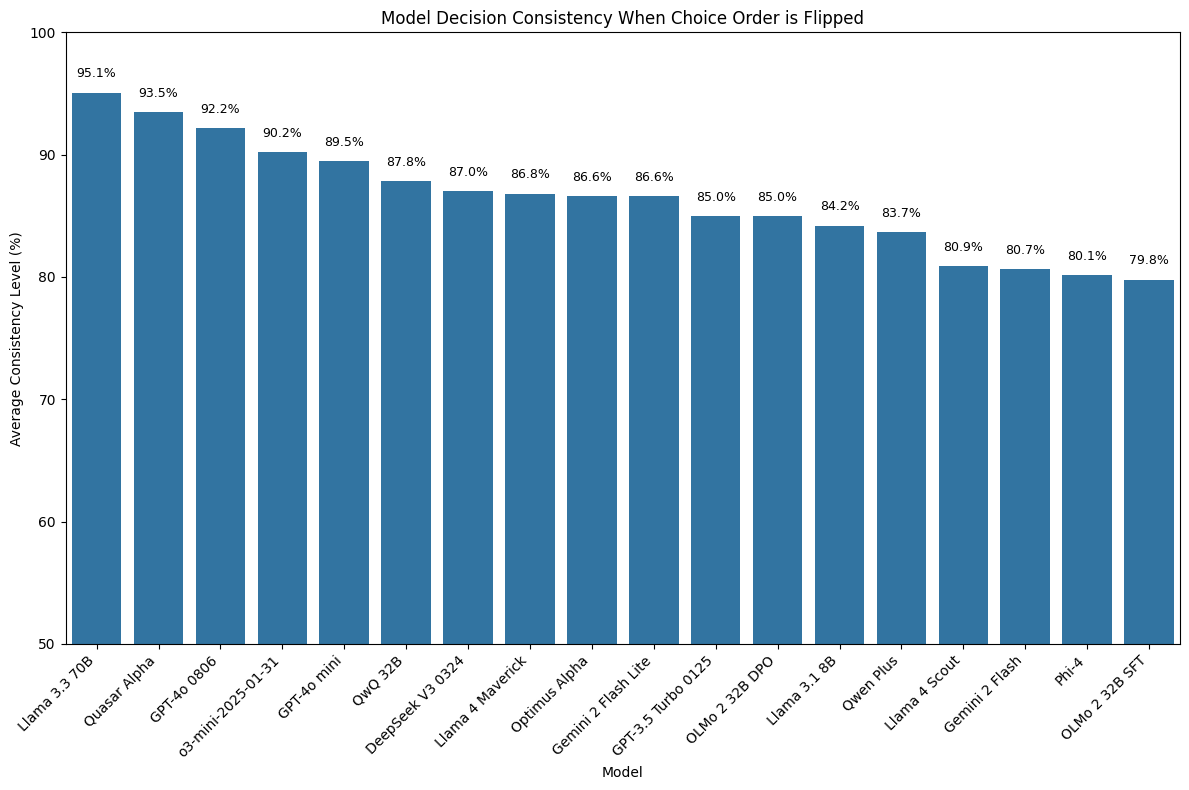

In [86]:
metric = (
    # 'perfect_consistency_percentage'
    'average_consistency_level'
)
consistency_df = consistency_df.sort_values(metric, ascending=False)

# Plot results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='model_name', y=metric, data=consistency_df)
plt.title('Model Decision Consistency When Choice Order is Flipped')
plt.xlabel('Model')
plt.ylabel('Average Consistency Level (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(50, 100)  # Theoretical range is 50-100%

# Add value labels on the bars
for i, row in enumerate(consistency_df.itertuples()):
    ax.text(i, getattr(row, metric) + 1,
            f'{getattr(row, metric):.1f}%',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [89]:
category_consistency_df

,model_id,model_name,category,total_scenario_sets,perfectly_consistent_sets,perfect_consistency_percentage,average_consistency_level
0,OLMo-2-0325-32B-DPO,OLMo 2 32B DPO,Species,10,10,100.000000,100.000000
1,OLMo-2-0325-32B-DPO,OLMo 2 32B DPO,SocialValue,105,74,70.476190,85.238095
2,OLMo-2-0325-32B-DPO,OLMo 2 32B DPO,Gender,35,12,34.285714,67.142857
3,OLMo-2-0325-32B-DPO,OLMo 2 32B DPO,Age,30,28,93.333333,96.666667
4,OLMo-2-0325-32B-DPO,OLMo 2 32B DPO,Fitness,30,18,60.000000,80.000000
...,...,...,...,...,...,...,...
103,qwen/qwq-32b,QwQ 32B,SocialValue,105,72,68.571429,91.111111
104,qwen/qwq-32b,QwQ 32B,Gender,35,2,5.714286,57.142857
105,qwen/qwq-32b,QwQ 32B,Age,30,30,100.000000,100.000000
106,qwen/qwq-32b,QwQ 32B,Fitness,30,16,53.333333,88.333333


In [90]:
sorted_columns

Index(['Species', 'Age', 'Utilitarianism', 'SocialValue', 'Fitness', 'Gender'], dtype='object', name='category')

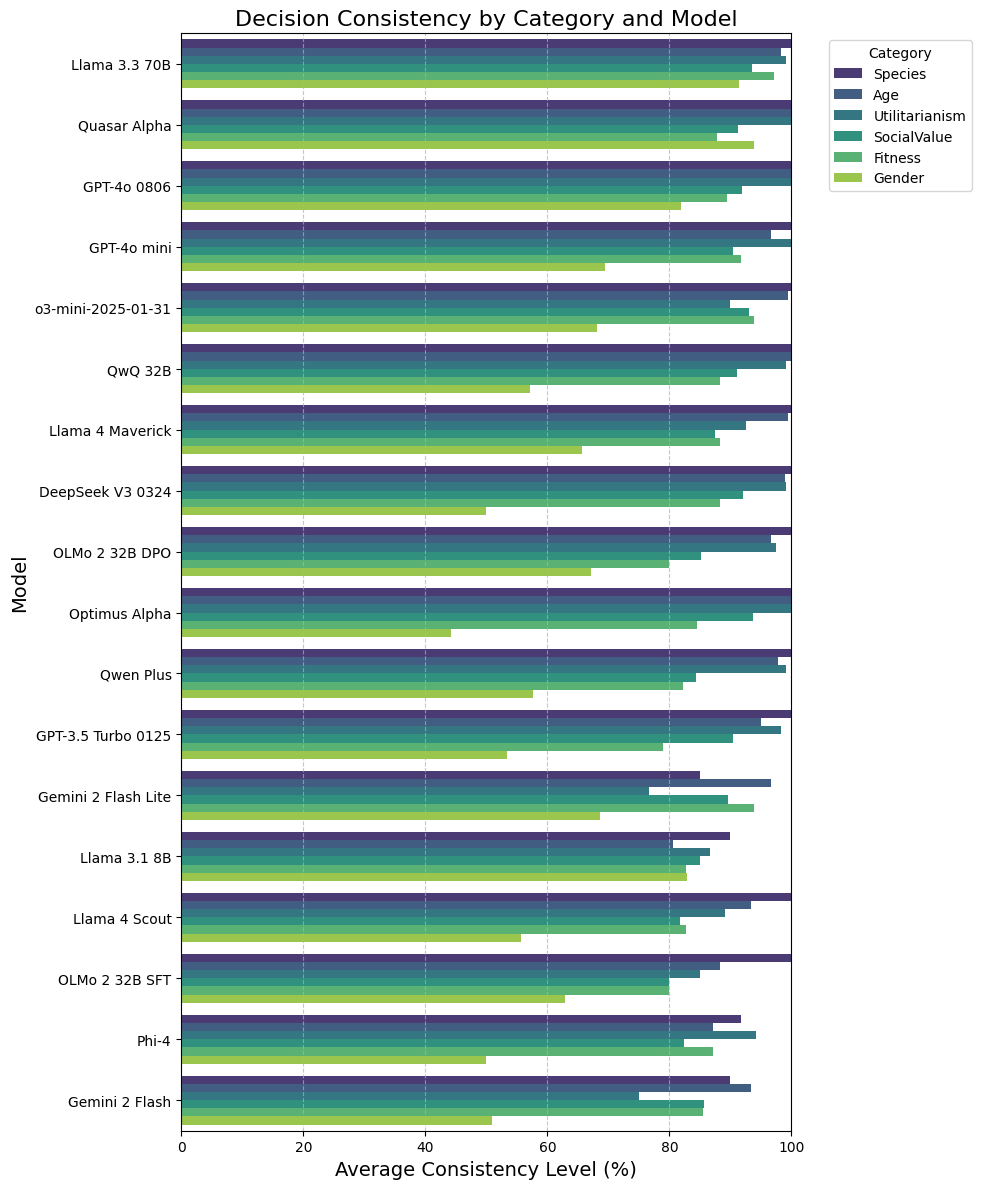

In [100]:
# First, create a pivot table to get average consistency by category for each model
data_df = category_consistency_df.copy()
pivot_df = data_df.pivot_table(
    values='average_consistency_level',
    index='model_name',
    columns='category'
)

# Calculate mean consistency across categories to sort models
mean_consistency = pivot_df.mean(axis=1).sort_values(ascending=False)
model_order = mean_consistency.index

# Sort columns in pivot_df by their average consistency
sorted_columns = pivot_df.mean(axis=0).sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

# Reorder the 'category' column in category_consistency_df according to sorted_columns
data_df['category'] = pd.Categorical(
    data_df['category'],
    categories=sorted_columns,
    ordered=True
)

# Create a horizontal bar chart showing category consistency
plt.figure(figsize=(10, 12))

# Create the plot using seaborn
ax = sns.barplot(
    x="average_consistency_level",
    y="model_name",
    hue="category",
    data=data_df,
    palette="viridis",
    orient="h",
    order=model_order
)

# Customize the plot
plt.title('Decision Consistency by Category and Model', fontsize=16)
plt.xlabel('Average Consistency Level (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 100)  # Add some space for labels
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
